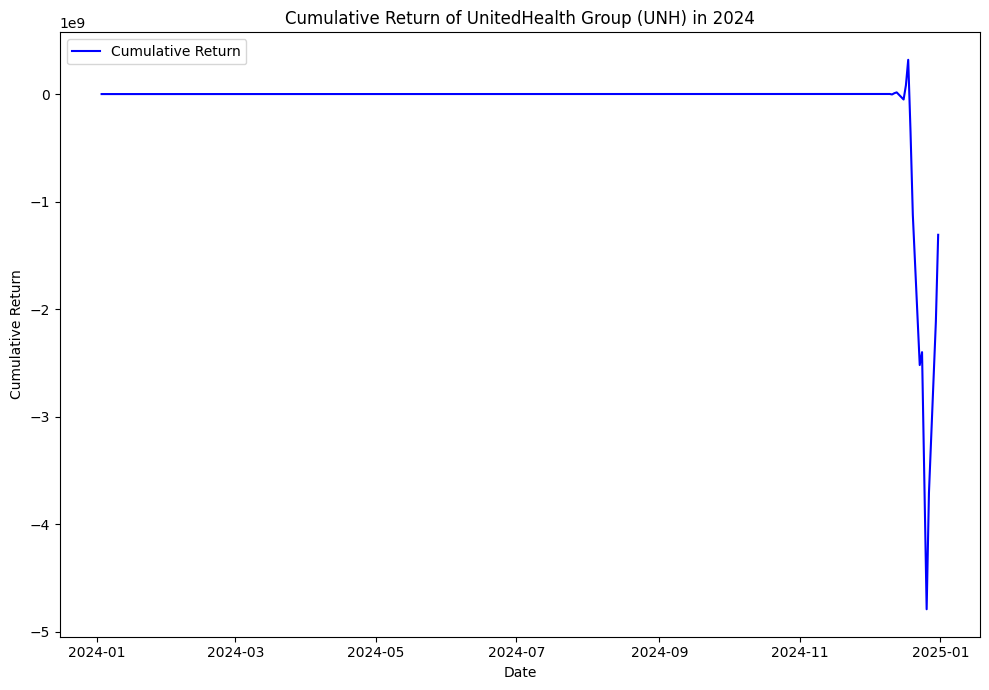

In [8]:
# đọc file rôi vẽ chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Đọc file CSV
df = pd.read_csv('../API-chatbot-langgraph/temp.csv')

# Hiển thị thông tin về DataFrame
df.columns = df.columns.str.strip().str.lower()
df["date"] = pd.to_datetime(df["date"])
df = df.dropna()
df["daily_return"] = df["daily_return"].astype(float)
df["cumulative_return"] = (1 + df["daily_return"]).cumprod() - 1
plt.figure(figsize=(10, 7))
plt.plot(df["date"], df["cumulative_return"], label="Cumulative Return", color='blue')
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return of UnitedHealth Group (UNH) in 2024")
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\thong\AppData\Local\Temp\ipykernel_24132\959054084.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped = df.groupby(df['month'].dt.to_period('M'))


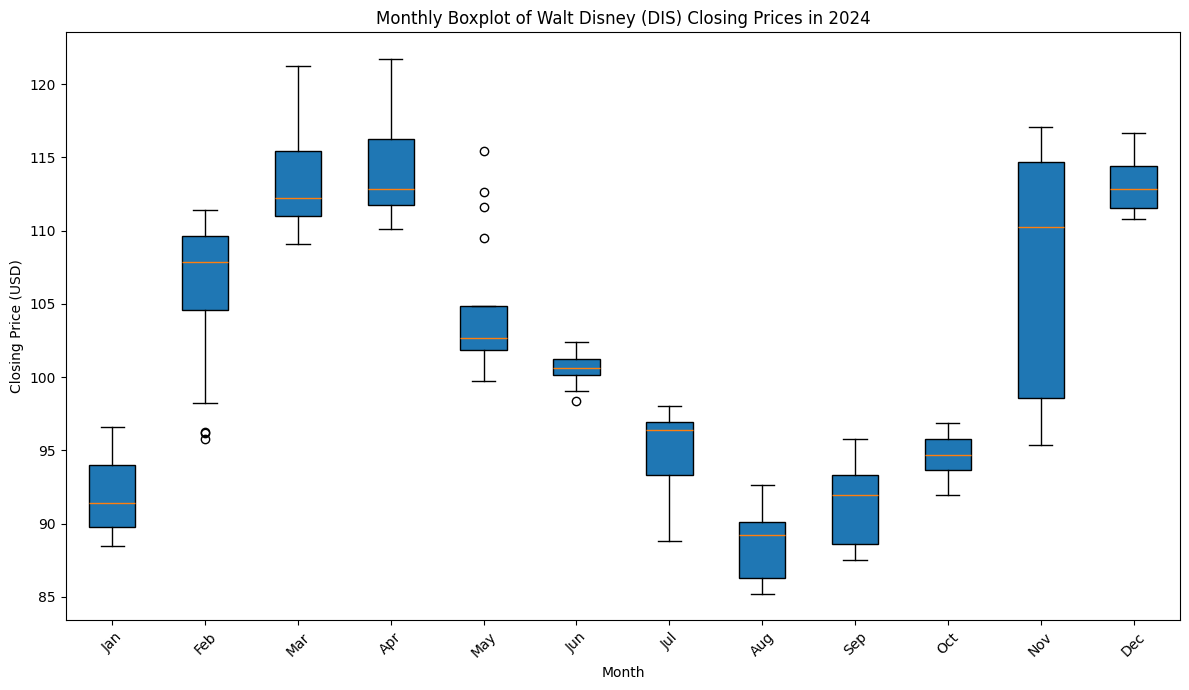

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file CSV
df = pd.read_csv('../API-chatbot-langgraph/temp.csv')

# Tiền xử lý dữ liệu
df.columns = df.columns.str.strip().str.lower()
df['close_price'] = df['close_price'].astype(float)
df['month'] = pd.to_datetime(df['month'])  # Chuyển 'month' thành datetime

# Xoá dòng thiếu dữ liệu
df = df.dropna(subset=['close_price', 'month'])

# Nhóm theo từng tháng
grouped = df.groupby(df['month'].dt.to_period('M'))

# Chuẩn bị dữ liệu cho boxplot
monthly_data = [group['close_price'].values for _, group in grouped]
month_labels = [month.strftime('%b') for month in grouped.groups.keys()]

# Vẽ biểu đồ boxplot
plt.figure(figsize=(12, 7))
plt.boxplot(monthly_data, patch_artist=True)
plt.xticks(ticks=range(1, len(month_labels) + 1), labels=month_labels, rotation=45)
plt.title('Monthly Boxplot of Walt Disney (DIS) Closing Prices in 2024')
plt.xlabel('Month')
plt.ylabel('Closing Price (USD)')
plt.tight_layout()
plt.show()
